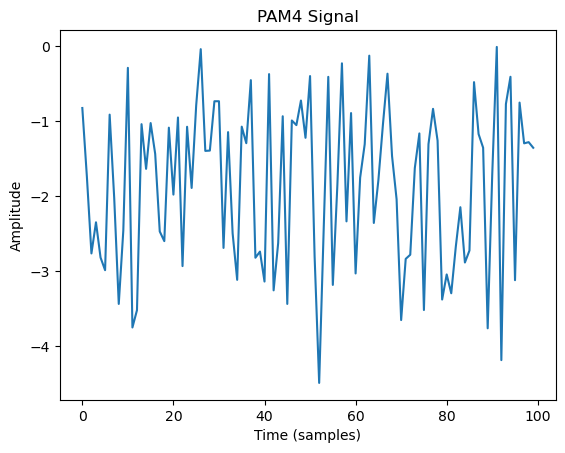

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def generate_pam4_signal(bits, amp=1, noise_std=0):
    # Truncate bits to ensure that its length is a multiple of 2
    bits = bits[:len(bits) // 2 * 2]
    # Convert bits to symbols
    symbols = bits.reshape(-1, 2)
    # Map symbols to amplitudes
    amplitudes = np.array([-3*amp, -1*amp, 1*amp, 3*amp])
    signal = amplitudes[symbols].flatten()
    # Add Gaussian noise
    noise = np.random.normal(scale=noise_std, size=signal.shape)
    signal = signal + noise
    return signal

def generate_eye_diagram(signal, sps, n_eyes=5):
    samples_per_eye = sps * 2
    eye_data = np.reshape(signal, (-1, samples_per_eye))
    eye_data = eye_data[:n_eyes, :]
    eye_data = np.concatenate((eye_data, eye_data[0:1, :]), axis=0)
    return eye_data

def plot_pam4_signal(signal):
    plt.plot(signal)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.title('PAM4 Signal')
    plt.show()

def plot_eye_diagram(eye_data, sps):
    num_eyes = eye_data.shape[0]
    x = np.arange(0, sps*2, 2)
    for i in range(num_eyes):
        plt.plot(x, eye_data[i, :])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.title('Eye Diagram')
    plt.show()

# Generate random bits
bits = np.random.randint(0, 2, size=101)
# Generate PAM4 signal with noise
signal = generate_pam4_signal(bits, amp=1, noise_std=0.5)
# Plot PAM4 signal
plot_pam4_signal(signal)


In [3]:
# Generate eye diagram
eye_data = generate_eye_diagram(signal, sps=4, n_eyes=5)
# Plot eye diagram
plot_eye_diagram(eye_data, sps=4)


ValueError: cannot reshape array of size 100 into shape (8)